# Assignment 2 specification

The purpose of this assignment is to analyse the Bike Sharing Dataset hosted on the UCI repository of datasets.

The dataset is provided with this notebook as a zip file.

There are two related datasets in the zip file: one aggregated by day, and the other aggregated by hour.

They represent the number of bikes that were shared/hired in Washington over that time period, together with the factors that are believed to predict the demand for such bikes.

They include the time unit and various measures of the weather etc. (in terms of temperature, humidity and wind-speed). More description can be found [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

You are asked to

1. Read the _hourly_ data and split into training and test data __[5 marks]__
2. For the training data only, use exploratory data analysis to learn about the data and to indicate how to build a model __[15 marks]__
3. Using a forward selection approach, build a regression model that offers the best performance, using a machine learning measure (prediction accuracy on the test data) __[30 marks]__
   - You need to pay particular attention to the regression model assumptions
   - For best performance, you will also need to perform feature engineering
     - modifying the existing features
     - transforming them
     - merging them
     - keeping feature correlation as low as possible
   - 10-fold cross-validation should be used to estimate the uncertainty in the fitted model parameters.
4. Which of the 3 target columns is easiest to predict accurately? __[5 marks]__
5. Using this "preferred target", derive a new target whose values are the grouped label (taking the values `Q1`, `Q2`, `Q3`, `Q4`) for demand in the quartiles (0 < demand <= 25th percentile of demand), (25th percentile of demand < demand <= 50th percentile of demand), .. You might find the [pandas quantile calculator](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) convenient when computing the quartile end points (25th, 50th and 75th percentiles), and pandas filtering by rows  convenient for assigning the new labels. __[5 marks]__
6. Use _two_ classification procedures to predict these demand quartiles, repeating the forward selection procedure to find the best model for each, but this time focusing on classification accuracy on the test set as the measure of performance. Are the same features used in each of the two models? __[35 marks]__
7. Which of the two machine learning procedures (regression and classification) provides the highest prediction accuracy on the test set? Why is this? __[5 marks]__

# Task 1: Read the _hourly_ data and split into training and test data.

##Start of Answer 1##

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
import phik
from sklearn.metrics import accuracy_score
from phik.report import plot_correlation_matrix
from phik import report

sns.set()

In [67]:
hour_data = pd.read_csv('Bike-sharing-dataset/hour.csv')
hour_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [68]:
from sklearn.model_selection import train_test_split

# Asign variable to features
# Asign variables to targets

targets = hour_data[['casual', 'registered', 'cnt']]
features = hour_data.drop(targets, axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(features, targets, test_size=0.2)

##End of Answer 1##

# Task 2: For the training data only, use exploratory data analysis to learn about the data and to indicate how to build a model

##Start of Answer 2##

In [69]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
sns.heatmap(df.corr())

NameError: name 'df' is not defined

Here in this heatmap we can see that there's quite a lot of correlations going on here. The more data we have correlating he harder it's going to be to mkae our prediction down the line. So we're gonna try thin it out a bit and make this data all more efficient.

In [71]:
features.drop(['dteday','workingday','atemp', 'season', 'instant' ], axis=1, inplace=True)

In [72]:
phik = features.phik_matrix()

interval columns not set, guessing: ['yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'hum', 'windspeed']


In [73]:
features.head()

,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed
0,0,1,0,0,6,1,0.24,0.81,0.0
1,0,1,1,0,6,1,0.22,0.80,0.0
2,0,1,2,0,6,1,0.22,0.80,0.0
3,0,1,3,0,6,1,0.24,0.75,0.0
4,0,1,4,0,6,1,0.24,0.75,0.0


<AxesSubplot:>

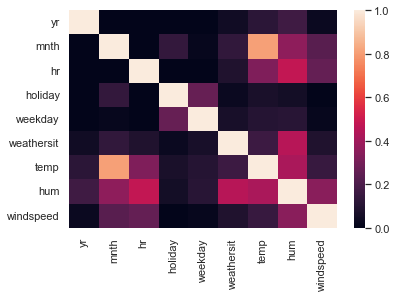

In [74]:
sns.heatmap(phik)

Here we can see from this heatmap a much clearer diagram of whats correlated to which without all of the uneccessary features

Reason for dropping each feature:

dteday: The reason why I dropped dteday was because it had a high correlation with a few other features such as yr, month, holiday and a couple of others. Keeping it would have made more difficult to accurately predict so for that reason it was dropped.


workingday: This feature was dropped because it was highly correlated with multiple features but especially holiday and weekday. I think weekday and working day are very similar because the vast majority of people who work will work on a weekday so to me it makes no sense in keeping both weekday and workingday so it's better off to get rid of one of them. It's obviously quite clear to see that people wouldn't be using bikes much during working days because they'd be busy in work themselves so it's pretty self explanitory. Not to mention how it would make the prediction harder in general.

atemp: The main reason why I dropped atemp was because it highly correlated with temp, because they're so similar it doesn't make enough sense to keep both of them. Trimming features like thise down will make the prediction easier and will save time. It's also quite correlated with season which is pretty self explanitory considering that the temperature will be higher in hotter seasons and lower in colder seasons. This means there's more people out cycling in the hotter seasons due to better weather.

season: This feature nearly had to be dropped due to it's very high correlation with too many features, such as mnth, temp, atemp, yr and a few more. It's uneccessary to keep considering we have mnth and temp. It's pretty obvious to know that the activity of bikes being used will be higher in months where there's a higher temperature. I definetely think that these two features make season uneccesary to have. It was also dropped due to how it would make our prediction uneccesarily hard.

instant: I dropped this feature because it was highly correlated with season, ty, mnth, temp and atemp. This once again would make our prediction uneccesarily hard. Not having would just be easier and working without it really doesn't change much because the reasons it's correlated with those feature so highly is again for reasons I stated above mainly due to the time of year and temeratures rising.



<AxesSubplot:xlabel='count', ylabel='holiday'>

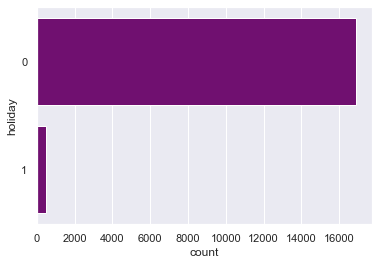

In [75]:
sns.countplot(y='holiday', data=features, color='purple')

This plot shows the amount of people using bikes on a holiday and when it's not a holiday. As we can see the bikes are used a lot more on days that aren't a holiday. This makes sense because there's obviously more days in the year that are not holidays by quite some margin. This for me explains the huge difference in numbers.

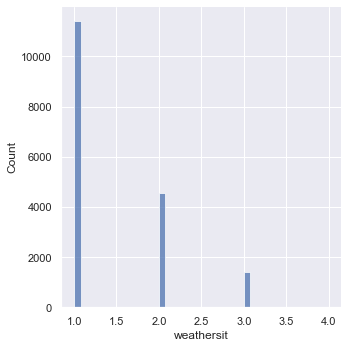

In [76]:
sns.displot(features, x="weathersit")

This plot is representing the type of weather that's happening and how that effects the amount of people outside cycling. 1 is clear, few clouds and partly cloudy so this is the best weather that can be asked for, therefore of course there will be more people cycling when the weathr is like that. The higher the number the worse the weather gets.

2 is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, This weather isn't great but still not that bad when you're talking about cycling so therefore the number of people will obviously react to that and possibly wait for a day time that the weather is better

3 is worse weather once again it contains Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. If there's weather like this then of course less people will be cycling because they wouldn't want to get wet or perhaps worse. Therefore there's another vast drop in people cycling.

<AxesSubplot:xlabel='count', ylabel='yr'>

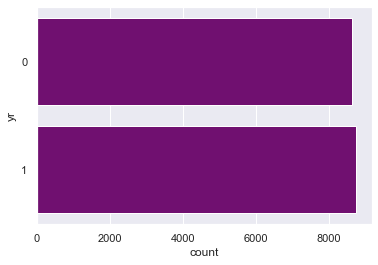

In [77]:
sns.countplot(y='yr', data=features, color='purple')

Looking at these 2 years that were judged against each other they obviously had quite similar numbers in terms of people using bikes. This tells me that factors such as weather, holidays and more were by average the same. This makes perfect sense that there may have been a slight increase as well due to more people knowing about how fun and efficient cycling is.

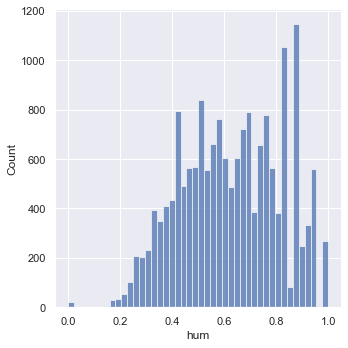

In [78]:
sns.displot(features, x="hum")

This plot represents the amount of people cycling based on the level of humidity. This is quite interesting because it's the first plot we've seen that has has a drop off in numbers of people cycling at both ends of the spectrum. First of all we'll look at the lower end.

Usually when the weather is rainy/wet and cold the level of humidity is very low this shows in the plot above on the lower end of the spectrum.

When we hit the mid 0.4 - 0.8 ish mark there's a vast increase in the amount of people out cyclyng because the weather is much better usually when you have slight higher humidity, it means with higher temperature the air is thinner slightly this is why there's more people out cycling.

Interestingly enough the the top end of the spectrum for humidity there's a drop off in people cycling. This tells me that it's actually too hot to be out cycling and people are perhaps looking for easier ways to travel by not exerting themselves when it's to hot. This makes sense and shows clearly in the plot.

<AxesSubplot:xlabel='mnth', ylabel='temp'>

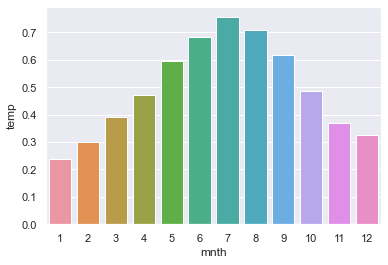

In [79]:
sns.barplot(x='mnth', y='temp', data=features, ci=None)

This diagram represents the influx in temperature depending on the month. As we can see in the summer months in june, July and August the temperature it at it's peak. And in the winter months in January,February and Decenmber is when the temperature is at it's lowest. From the previous plots before I'm sure there was an influx in people cycling in these warmer months and visa versa being a lot less people cycling in the colder months.

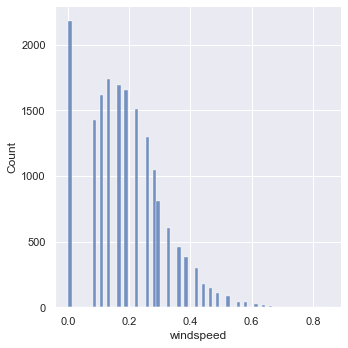

In [80]:
sns.displot(features, x="windspeed")

Having a low windspeed will have a big impact on the amount of people out cycling. If there's high winds then it could end up being dangerous to cycle in it. Therefore less people would be cycling then. We can clearly see when there's virtual no high winds that a lot of people are cycling. This tells me that the weather report will be a big determination on how many bikes need to be available at this time. Perhaps more need to be prepared prior because of the higher demand.

<AxesSubplot:xlabel='hr', ylabel='temp'>

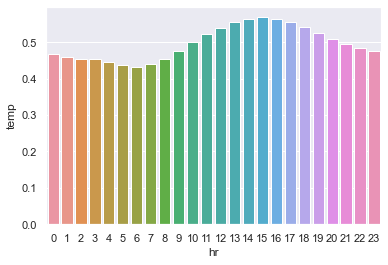

In [81]:
sns.barplot(x='hr', y='temp', data=features, ci=None)

As we can see there is a rise in activity of people using bikes arounf the 9am point, this can also be down to peple using them to commute to work and keeping this in mind they probably use the bikes to commute home as well this is why it's still a high vale at 5-6 pm. This is why it would also taper off more in the later hours cause usually people would prefer spending their evenings at home.

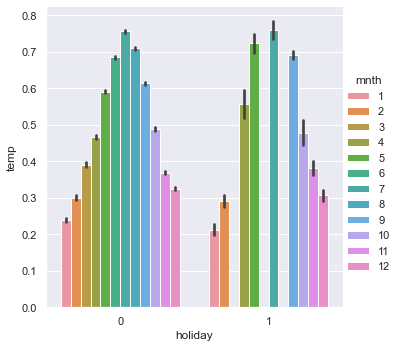

In [82]:
sns.catplot(data=features, x="holiday", y="temp", hue="mnth", kind="bar")

This plot is a bit combination of a few features that would determine the number of cyclists in a given year. To mention an above plot once again the temperature is often being determined by the month it's in. The hotter months will be in the summer and the colder months will be in the winter, this will all have an effect on the amount of people cycling and the demand involved.

We can also see that in some months there are no holidays at all. This may have an effect on the amount of people cycling. This plot also tells us that even though in months where there are holidays it doesn't really effect the amount of people cycling so it's not at the top of the priority list in determining factors.

In [83]:
features.head()

,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed
0,0,1,0,0,6,1,0.24,0.81,0.0
1,0,1,1,0,6,1,0.22,0.80,0.0
2,0,1,2,0,6,1,0.22,0.80,0.0
3,0,1,3,0,6,1,0.24,0.75,0.0
4,0,1,4,0,6,1,0.24,0.75,0.0


# EDA Conclusion


Through exploratory data analysis we got to investigate what features would make our prediction easier and which would make it harder. Getting rid of high correlated features would give us a cleaner and easier way of doing it. It was decided to remove unessacry features that were similar in meaning and purpose to already existing ones. This will make it easier to get our predictions later.

##End of Answer 2##

# Task 3: Using a forward selection approach, build a regression model that offers the best performance

##Start of Answer 3##

In [84]:
xtrain.drop(['dteday','workingday','atemp', 'season', 'instant' ], axis=1, inplace=True)

In [85]:
xtest.drop(['dteday','workingday','atemp', 'season', 'instant' ], axis=1, inplace=True)

I decided to drop the same features as I did before for similar enough reasons as to the last task. The correlation were slightly too high in these feature and to be able to get a accurate prediction as we'll perform below they need to be removed.

In [86]:
from sklearn import linear_model

In [87]:
model = linear_model.LinearRegression()

In [88]:
def findNextBestPredictor(X,foundPredictors, col):
    nP = X.shape[1] # number of columns in X
    allPredictors = list(X) # See https://stackoverflow.com/a/19483025
    predictorsToSearch = set(allPredictors) - set(foundPredictors)
    maxScore = 0 # can usually do better than this!
    for predictor in predictorsToSearch: # loop over all remaining columns (predictors) in X
        trialPredictors = set(foundPredictors)
        trialPredictors.add(predictor) # Add this predictor to the existing predictors
        XcolSubset = X.loc[:,list(trialPredictors)] # all rows and just the trial predictors
        model.fit(XcolSubset, ytrain[col]) # fit the model to y
        xtrain = model.score(XcolSubset, ytrain[col])
        if xtrain > maxScore: # identify the largest score and its associated predictor
            maxScore = xtrain
            bestPredictorFound = predictor

    return (maxScore, bestPredictorFound)

# findNextBestPredictor(xtrain, list())

In [89]:
def predScore(df2, col):
    nP = df2.shape[1]
    scores = [0]
    foundPredictors = list()

    for i in range(nP): # loop over all columns (predictors) in X
        (score, bestPredictorFound) = findNextBestPredictor(df2, foundPredictors, col)
        foundPredictors.append(bestPredictorFound)
        scores.append(score)
        print(foundPredictors, score, col)

    print(foundPredictors)
    print(scores)
    return scores

['temp'] 0.2093934577991584 casual
['temp', 'hum'] 0.31125031264183 casual
['temp', 'hum', 'hr'] 0.3372316715199666 casual
['temp', 'hum', 'hr', 'yr'] 0.3478349454412294 casual
['temp', 'hum', 'hr', 'yr', 'holiday'] 0.3493334327998132 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday'] 0.3502921728937194 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth'] 0.35120510801787064 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit'] 0.3512508867701528 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed'] 0.35127344202115285 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed']
[0, 0.2093934577991584, 0.31125031264183, 0.3372316715199666, 0.3478349454412294, 0.3493334327998132, 0.3502921728937194, 0.35120510801787064, 0.3512508867701528, 0.35127344202115285]
['hr'] 0.13983747409177472 registered
['hr', 'temp'] 0.21951454711429796 registered
['hr', 'temp', 'yr'] 0.27844165579

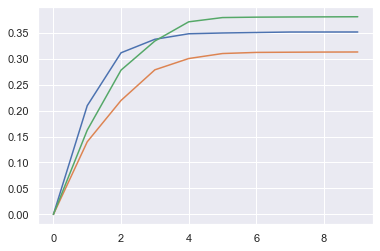

In [90]:
for col in ytrain.columns.values:
    scores = predScore(xtrain, col)
    plt.plot(scores)

As shown above we were able to get a score prediction for our features. The more features added obviously the higher the value will be.

In this plot we see that the green line is cnt, the blue line is casual and the red line is registered.

In [91]:
# model.fit(xtrain,ytrain['Quantile'])
#
# ypredScore=model.predict(xtest)
#
# showDiagnostics(ytest['Quantile'], ypredScore)

# Task 3 Conclusion

With the completion of this task we found out the score of each target. They were all quite close in their scores but there was of course a best of the 3. In this case it was cnt.

##End of Answer 3##

# Task 4: Which of the 3 target columns is easiest to predict accurately?

##Start of Answer 4##

In [92]:
for a in ytrain.columns.values:
    print(a)
    predScore(xtrain, a)

casual
['temp'] 0.2093934577991584 casual
['temp', 'hum'] 0.31125031264183 casual
['temp', 'hum', 'hr'] 0.3372316715199666 casual
['temp', 'hum', 'hr', 'yr'] 0.3478349454412294 casual
['temp', 'hum', 'hr', 'yr', 'holiday'] 0.3493334327998132 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday'] 0.3502921728937194 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth'] 0.35120510801787064 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit'] 0.3512508867701528 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed'] 0.35127344202115285 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed']
[0, 0.2093934577991584, 0.31125031264183, 0.3372316715199666, 0.3478349454412294, 0.3493334327998132, 0.3502921728937194, 0.35120510801787064, 0.3512508867701528, 0.35127344202115285]
registered
['hr'] 0.13983747409177472 registered
['hr', 'temp'] 0.21951454711429796 registered
['hr', 'temp', '

Out of the 3 targets given cnt was the easiest to predict in the end. This is because it's the highest value of the targets and it's results are more evenly distributed and stay more consistent.



In [93]:
for a in ytrain.columns.values:
    print(a)
    predScore(xtrain, a)

casual
['temp'] 0.2093934577991584 casual
['temp', 'hum'] 0.31125031264183 casual
['temp', 'hum', 'hr'] 0.3372316715199666 casual
['temp', 'hum', 'hr', 'yr'] 0.3478349454412294 casual
['temp', 'hum', 'hr', 'yr', 'holiday'] 0.3493334327998132 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday'] 0.3502921728937194 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth'] 0.35120510801787064 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit'] 0.3512508867701528 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed'] 0.35127344202115285 casual
['temp', 'hum', 'hr', 'yr', 'holiday', 'weekday', 'mnth', 'weathersit', 'windspeed']
[0, 0.2093934577991584, 0.31125031264183, 0.3372316715199666, 0.3478349454412294, 0.3493334327998132, 0.3502921728937194, 0.35120510801787064, 0.3512508867701528, 0.35127344202115285]
registered
['hr'] 0.13983747409177472 registered
['hr', 'temp'] 0.21951454711429796 registered
['hr', 'temp', '

##End of Answer 4##

As we can see I dropped the uneccessary features that followed to best score I've decided on. In terms of the best score I think cnt has the best overall result and it's individual score is the 0.38137597.

This was quite tough to decide, especially cause in terms of value each target had a similar enough growth in value pattern. However there were slight notice-abilities in terms of finding a more consistent rise in value, this was found with the cnt target.

# Task 5: Using this "preferred target", derive a new target whose values are the grouped label

##Start of Answer 5##

In [94]:
pd.qcut(ytrain['cnt'], 4)
pd.qcut(ytest['cnt'], 4)

6710      (0.999, 43.0]
11941    (288.0, 968.0]
10195     (43.0, 146.5]
10464     (0.999, 43.0]
2443      (0.999, 43.0]
              ...      
14798    (288.0, 968.0]
3063     (146.5, 288.0]
10715    (146.5, 288.0]
11824    (146.5, 288.0]
2785      (43.0, 146.5]
Name: cnt, Length: 3476, dtype: category
Categories (4, interval[float64, right]): [(0.999, 43.0] < (43.0, 146.5] < (146.5, 288.0] < (288.0, 968.0]]

In [95]:
ytrain['Quantile'] = pd.qcut(ytrain['cnt'], 4, labels=[4,3,2,1])
ytest['Quantile'] = pd.qcut(ytest['cnt'], 4, labels=[4,3,2,1])
ytest

,casual,registered,cnt,Quantile
6710,1,6,7,4
11941,134,734,868,1
10195,4,116,120,3
10464,2,24,26,4
2443,1,14,15,4
...,...,...,...,...
14798,80,594,674,1
3063,48,170,218,2
10715,37,147,184,2
11824,74,156,230,2


##End of Answer 5##

# Task 6: Use _two_ classification procedures to predict these demand quartiles

##Start of Answer 6

In [96]:
#scale data in task 3 ytrain - Yscaled

In [97]:
xtrain.drop(['weathersit','windspeed' ], axis=1, inplace=True)

In [98]:
xtest.drop(['weathersit','windspeed' ], axis=1, inplace=True)

In [99]:
ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 6710 to 2785
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   casual      3476 non-null   int64   
 1   registered  3476 non-null   int64   
 2   cnt         3476 non-null   int64   
 3   Quantile    3476 non-null   category
dtypes: category(1), int64(3)
memory usage: 112.2 KB


The dataframe contains 3476 entries with 4 columns, casual, registered, cnt and Quantile. If what we've done previousy is correct then we should have the same 4 columns for ytrain. The first three columns are int64 type and the fourth column is a category type.

In [100]:
ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 16143 to 1101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   casual      13903 non-null  int64   
 1   registered  13903 non-null  int64   
 2   cnt         13903 non-null  int64   
 3   Quantile    13903 non-null  category
dtypes: category(1), int64(3)
memory usage: 448.2 KB


As we can see the correct 4 columns are here in ytrain which matches with ytest

In [101]:
def findNextBestPredictor(X, model,foundPredictors):
    nP = X.shape[1] # number of columns in X
    allPredictors = list(X) # See https://stackoverflow.com/a/19483025
    predictorsToSearch = set(allPredictors) - set(foundPredictors)
    maxScore = 0 # can usually do better than this!
    for predictor in predictorsToSearch: # loop over all remaining columns (predictors) in X
        trialPredictors = set(foundPredictors)
        trialPredictors.add(predictor) # Add this predictor to the existing predictors
        XcolSubset = X.loc[:,list(trialPredictors)] # all rows and just the trial predictors
        testXcolSubset = xtest.loc[:,list(trialPredictors)]
        model.fit(XcolSubset, ytrain['Quantile']) # fit the model to y
        ypredScore = model.predict(testXcolSubset)
        if accuracy_score(ytest['Quantile'],ypredScore > maxScore):
            maxScore = accuracy_score(ytest['Quantile'],ypredScore)
            bestPredictorFound = predictor

    return (maxScore, bestPredictorFound)

This will find the two best predictors in X.

In [102]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def showDiagnostics(y, ypredScore):
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",accuracy_score(y, ypredScore))
    print("Confusion Matrix:")
    print(confusion_matrix(y, ypredScore))
    print("Classification Report:")
    print(classification_report(y, ypredScore, digits=3))


Here we calculate the accuracy of our find next best predictor function that will be added to our 2 classification tests

In [103]:
def classification_score(Model):

    nP = xtest.shape[1]
    scores = [0]
    foundPredictors = list()

    for i in range(nP): # loop over all columns (predictors) in X
        (score, bestPredictorFound) = findNextBestPredictor(xtest, foundPredictors, model)
        foundPredictors.append(bestPredictorFound)
        scores.append(score)
        print(foundPredictors, score)

    print(foundPredictors)
    print(scores)

Here we loop over all the columns to help determine the predictors in X

In [104]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Classifier
clf=GaussianNB()

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain['Quantile'])

# prediction on test set
ypredScore=clf.predict(xtest)

showDiagnostics(ytest['Quantile'], ypredScore)

Accuracy: 0.562428078250863
Confusion Matrix:
[[553 172  28 115]
 [304 330 117 119]
 [ 49 217 307 295]
 [  3   8  94 765]]
Classification Report:
              precision    recall  f1-score   support

           1      0.608     0.637     0.622       868
           2      0.454     0.379     0.413       870
           3      0.562     0.354     0.434       868
           4      0.591     0.879     0.707       870

    accuracy                          0.562      3476
   macro avg      0.554     0.562     0.544      3476
weighted avg      0.554     0.562     0.544      3476



In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
clf=KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain['Quantile'])

# prediction on test set
ypredScore=clf.predict(xtest)

showDiagnostics(ytest['Quantile'], ypredScore)

Accuracy: 0.7920023014959724
Confusion Matrix:
[[776  92   0   0]
 [176 610  84   0]
 [ 36 181 612  39]
 [  8  18  89 755]]
Classification Report:
              precision    recall  f1-score   support

           1      0.779     0.894     0.833       868
           2      0.677     0.701     0.689       870
           3      0.780     0.705     0.740       868
           4      0.951     0.868     0.907       870

    accuracy                          0.792      3476
   macro avg      0.797     0.792     0.792      3476
weighted avg      0.797     0.792     0.792      3476



As we can see the KNN classification came out as more accurate. We know this based on the accuracy result, the macro avg, the weighted average. All of these results were just a bit better and it shows.

In [106]:
xtest

,yr,mnth,hr,holiday,weekday,temp,hum
6710,0,10,4,0,3,0.54,0.94
11941,1,5,18,0,4,0.66,0.27
10195,1,3,21,0,1,0.26,0.37
10464,1,3,3,0,6,0.44,0.88
2443,0,4,17,0,6,0.50,0.88
...,...,...,...,...,...,...,...
14798,1,9,19,0,4,0.64,0.65
3063,0,5,13,0,4,0.62,0.57
10715,1,3,14,0,2,0.40,0.24
11824,1,5,21,0,6,0.60,0.60


In [107]:
xtrain

,yr,mnth,hr,holiday,weekday,temp,hum
16143,1,11,9,0,6,0.36,0.66
8171,0,12,3,0,1,0.18,0.74
4044,0,6,10,0,3,0.74,0.70
10681,1,3,4,0,1,0.44,0.82
11106,1,4,23,0,4,0.42,0.35
...,...,...,...,...,...,...,...
5076,0,8,10,0,4,0.72,0.71
17031,1,12,10,0,1,0.38,0.87
5081,0,8,15,0,4,0.80,0.55
8574,0,12,1,0,4,0.22,0.47


# Task 6 Conclusion

We have learned a lot from this task. We got to compare the 2 well known and used machine learning procedures and found out which was the best used for our situation. All columns and results favoured the KNN procedure and if we were to use this in an everyday real life scenario I would highly recommend it ahead of the Naive Bayes classifier.

##End of Answer 6##

# Task 7: Which of the two machine learning procedures provides the highest prediction accuracy on the test set?

##Start of Answer 7

# Naive Bayes Classifier

The accuracy of the model is 55.4%.
The precision for the class 1 is 0.594, precision for class 2 is 0.439, precision for class 3 is 0.526 and precision for class 4 is 0.608.
The recall for the class 1 is 0.634, recall for class 2 is 0.389, recall for class 3 is 0.334 and recall for class 4 is 0.857.
The f1-score for the class 1 is 0.613, f1-score for class 2 is 0.412, f1-score for class 3 is 0.408 and f1-score for class 4 is 0.712.

# KNN Classifier

The overall accuracy is 78.5%. This means that the model can correctly classify 78.5% of the images into their respective classes.

The confusion matrix gives us insight on how well the model is performing for each class. For example, for class 1, the model correctly classified 88.8% of the images, while for class 4 it correctly classified 83.6%.

The classification report also provides further insights into how well the model is performing. For example, the precision scores indicate how many of the images classified as a particular class were actually that class. The recall scores indicate the proportion of actual images of a class that were correctly classified. The f1-score is a combination of precision and recall.

Overall, the model is performing reasonably well with an accuracy score of 78.5%. This could be improved by using more data or by using different model architectures.

# Comparison

Between the two machine learning procedures It's clear the KNN  Classifier had a higher and better prediction accuracy on the test set. This is based mainly off the vast difference in the accuracy score. The Naive Bayes Classifier came in with a 55.4% accuracy score where as the KNN model had a much better score of 78.5%.


##End of Answer 7##